# Graph Analysis
### Prim's algorithm for minimum spanning tree (MST)
**Minimum spanning tree** is a subset of edges in a connected, weighted, undirected graph that connects all nodes without any cycles and has the minimum possible total edge weight. 
- It finds the most cost-efficient way to connect all nodes using the least total weight while maintaining connectivity.

**Prim's algorithm** finds a **Minimum Spanning Tree (MST)** by **growing a single tree** from an arbitrary starting node. It always adds the **cheapest edge** that connects a node in the growing tree to a node outside it.
- For efficiency, we use a **priority queue** to select the next edge. 

<hr>

Some key points about Prim's algorithm for a graph $G=(V,E)$:
- **Time Complexity:** O((|V|+|E|) log |V|) using a binary heap.
- **Space complexity:** O(|V|) without considering the adjacency list for the graph.
- **Optimality:** Prim's algorithm guarantees an optimal MST for connected, weighted, undirected graphs.

<hr>

In the following, we implement Prim's algorithm with a binary min-heap as a priority queue (similar to some previous search algorithms). Next, we use it for a simple graph to get its MST. Finally, we display the graph and its MST using module **NetworkX**.

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# import required module
import heapq
# Import required modules to display graphs
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
def prim_mst(graph):
    """Prim's algorithm for MST"""
    '''graph: an adjacency list with edge weights'''
    # Initialization
    mst_edges = [] # Store MST edges
    visited = set() # Track visited nodes
    # Choose arbitrary start
    start_node = list(graph.keys())[0]
    
    # Priority queue: (weight, from, to)
    heap = []
    heapq.heappush(heap, (0, None, start_node))
    
    while heap and len(visited) < len(graph):
        # Extract minimum edge from heap
        weight, from_node, to_node = heapq.heappop(heap)
        
        # Skip if already visited
        if to_node in visited:
            continue
        
        # Mark as visited    
        visited.add(to_node)
        # Add to MST (if not start node)
        if from_node is not None:
            mst_edges.append((from_node, to_node, weight))
        
        #Expand neighbors
        # Add all edges from current to_node
        for neighbor, edge_weight in graph[to_node]:
            if neighbor not in visited:
                heapq.heappush(heap, (edge_weight, to_node, neighbor))
    
    return mst_edges

In [3]:
# Example 
# Adjacency list representation
graph_adj = {
    0: [(1, 4), (2, 7)],
    1: [(0, 4), (2, 1), (3, 2)],
    2: [(0, 7), (1, 1), (3, 4), (4, 5)],
    3: [(1, 2), (2, 4), (4, 6), (5, 3)],
    4: [(2, 5), (3, 6), (5, 2)],
    5: [(3, 3), (4, 2)]
}
print(f'The graph has {len(graph_adj)} nodes.')
# Find MST using Prim's
mst_prim = prim_mst(graph_adj)
print('-'*30)
print(f"Prim's MST Edges: (no. edges: {len(mst_prim)})")
for u, v, w in mst_prim:
    print(f"  {u} -- {v} (weight: {w})")

The graph has 6 nodes.
------------------------------
Prim's MST Edges: (no. edges: 5)
  0 -- 1 (weight: 4)
  1 -- 2 (weight: 1)
  1 -- 3 (weight: 2)
  3 -- 5 (weight: 3)
  5 -- 4 (weight: 2)


<hr style="height:3px;background-color:lightblue">

### Display the graph and its  MST
Here, we use module **NetworkX** to display the graph and its MST

In [4]:
# Extra, a function to convert your graph to Networkx style,
# introduced in an earlier post
def convert_to_networkx(your_graph, directed=False):
    """
    Convert your custom graph to NetworkX format.
    your_graph: dict in format {node: [neighbors]}
    """
    if directed:
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()
    
    for u, neighbors in your_graph.items():
        for v in neighbors:
            if isinstance(v,tuple):
                nx_graph.add_edge(u, v[0],weight=v[1])
            else:
                nx_graph.add_edge(u, v)
    
    return nx_graph

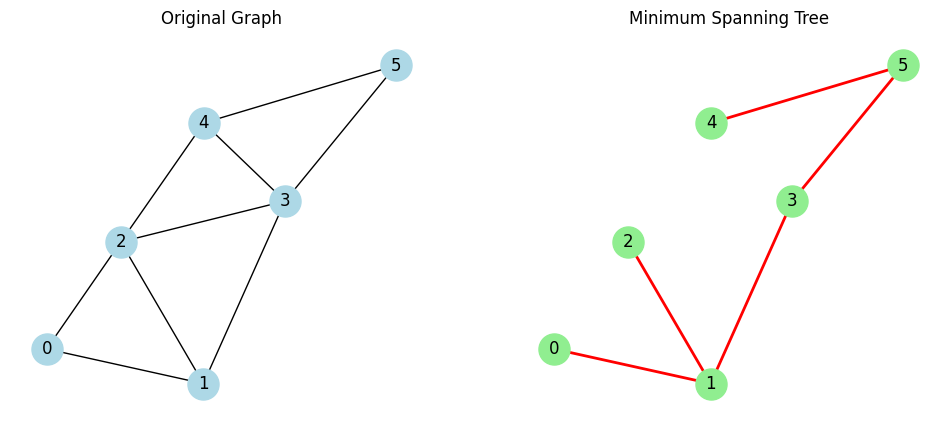

In [5]:
# Convert original graph to NetworkX using YOUR function
original_nx = convert_to_networkx(graph_adj)
# Create MST graph
mst_nx = nx.Graph()
for u, v, weight in mst_prim:
    mst_nx.add_edge(u, v, weight=weight)
# Visualize
pos = nx.spring_layout(original_nx)

plt.figure(figsize=(12, 5))

# Left: Original graph
plt.subplot(1, 2, 1)
nx.draw(original_nx, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=12)
plt.title("Original Graph")

# Right: MST
plt.subplot(1, 2, 2)
nx.draw(mst_nx, pos, with_labels=True, node_color='lightgreen', 
        node_size=500, font_size=12, edge_color='red', width=2)
plt.title("Minimum Spanning Tree")
plt.show()